### <앙상블 모델>

- tree 구조(결정트리)를 기반으로 만들어진 모델

- 여러 개의 트리 모델을 이용해서 훈련하는 모델을 앙상블 모델이라고 칭한다.

### <앙상블 모델 분류>

- 회귀와 분류에서 모두 사용 가능한 앙상블 모델들이 존재한다.

- 패키지 : sklean, xgb, 이외 다수

- 배깅(Bagging) 방식의 앙상블 모델과, 부스팅(Boosting) 방식의 앙상블 모델로 구분된다(내부에서 트리모델 여러개를 어떻게 사용하는지에 따른 구분).

### <배깅(Bagging)과 부스팅(Boosting) 방식>

- 훈련 데이터를 여러 트리모델에 각각에 적용하는 방식에 따라서 구분된다.

- 배깅(Bagging)

    - 사용되는 여러 개의 트리모델들 각각은 서로 독립적으로 사용됨(연관성 없음)
 
    - 훈련 데이터는 여러 트리모델 각각에 랜덤하게 적용된다.
 
    - 훈련에 사용되는 데이터가 중복되어 적용될 수도 있다.
 
    - 훈련 데이터를 사용한 후에는 반환하는 방식을 사용 -> 반환 후에 다시 랜덤하게 추출하여 여러 트리모델 각각에 적용됨(그래서 훈련 데이터로 중복 사용될 수 있음)
 
    - 대표적인 배깅 앙상블 모델 : RandomForest
 
    - 이외 모델 : ExtraTree
 
    - 예측 또는 분류 방식 : 회귀에서는 평균값을 이용하고, 분류에서는 과반수(확률)에 따라 결정됨
 
    - 과적합을 해소하는 모델로 주로 사용됨

- 부스팅(Boosting)

    - 사용되는 여러 개의 트리 모델은 서로 연관성을 가짐
 
    - 이전 트리 모델의 오차를 보완하여 다음 트리 모델에서 이어서 훈련이 진행되는 방식
 
    - 훈련 데이터는 랜덤하게 추출되어 사용되지만, 이전 트리 모델에서 훈련 오차가 발생했던 훈련 데이터에 가중치를 스스로 부여하는 방식
 
    - 대표적인 부스팅 앙상블 모델 : Gradient Boosting
 
    - 이외 모델 : Histogram-based Gradient Boosting, XGBoost
 
    - 회귀에서는 결정 계수, 분류에선느 정확도를 높이기 위해 주로 사용됨 (과적합 해소에도 주로 사용됨)
 
### <실제 모델 적용 순서(규칙은 없음)>

- 앙상블 모델을 이용하는 경우에는 보통 RandomForest를 처음에 진행한다(주로 처음에 진행).

    - RandomForest 모델은 정확도가 높은 모델로 유명하며, 현재는 부스트 모델이 정확도가 좀 더 높게 나오는 추세임
 
- 최종 모델 선정 시에는 분류 모델 전체를 사용하여 비교 후 선정해야 한다.

# RandomForest(랜덤 포레스트)

In [1]:
### wine.csv 데이터 읽어들이기
# - 변수명 : wine
import pandas as pd

file_path = './data/08_wine.csv'
wine = pd.read_csv(file_path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
### 결측치와 이상치 기본 확인하기
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### <와인 종류 분류하기>

- 와인 종류(class) : 레드 와인(0), 화이트 와인(1)

### <훈련에 사용할 데이터>

- 독립 변수 : alcohol(알콜), sugar(당도), pH(산성도)

- 종속 변수 : class(와인 종류)

In [3]:
### 독립 변수와 종속 변수로 데이터 분리하기
# - 독립 변수명 : data
# - 종속 변수명 : target
# - numpy 배열 타입으로 데이터를 분리 생성

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

In [4]:
### 훈련:테스트 데이터로 분류하기
# - 훈련(8) : 테스트(2)로 분류하기
# - 사용 변수 : train_input, train_target, test_input, test_target

# 라이브러리 import
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42)

In [5]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

### <데이터 스케일링>

- 서로 다른 변수(특성) 값의 크기(단위)를 일정한 수준으로 맞추는 작업을 의미함

- 수치형 변수(특성)에만 적용함

### <스케일링 방법 3가지>
- 정규화 : StandardScaler, RobustScaler

- 표준화 : MinMaxScaler

    - StandardScaler : 분류 또는 회귀에서 사용 가능하며, 주로 분류에서 사용됨
 
    - RobustScaler : 분류 및 회귀에서 모두 사용 가능(많이 사용되지 않음)
 
    - MinMaxScaler : 분류 또는 회귀에서 사용 가능하며, 주로 회귀에서 사용됨 (최대 및 최소 범위 내에서 처리되는 방식)
 
- 스케일링의 경우 StandardScaler 또는 MinMaxScaler가 주로 사용됨(회귀 / 분류 구분하지 않고 모두 적용 후 훈련 성능 비교하면 좋음)

In [6]:
### 데이터 스케일링(정규화 또는 표준화)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### StStandardScaler로 정규화
# - 클래스 : ss
# - 독립 변수명 : train_std_scaler, test_std_scaler

ss = StandardScaler()
ss.fit(train_input)

train_std_scaler = ss.transform(train_input)
test_std_scaler = ss.transform(test_input)

train_std_scaler.shape, test_std_scaler.shape

((5197, 3), (1300, 3))

In [7]:
### RobustScaler로 스케일링하기
# - 클래스명 : rs
# - 독립변수명 : train_rs_scaler, test_rs_scaler
rs = RobustScaler()
rs.fit(train_input)

train_rs_scaler = rs.transform(train_input)
test_rs_scaler = rs.transform(test_input)

train_rs_scaler.shape, test_rs_scaler.shape

((5197, 3), (1300, 3))

In [8]:
### MinMaxScaler로 스케일링하기
# - 클래스명 : mm
# - 독립변수명 : train_mm_scaler, test_mm_scaler
mm = MinMaxScaler()
mm.fit(train_input)

train_mm_scaler = mm.transform(train_input)
test_mm_scaler = mm.transform(test_input)

train_mm_scaler.shape, test_mm_scaler.shape

((5197, 3), (1300, 3))

##### 내 코드

In [9]:
### 스케일링 처리를 함수로 만들어서 사용해보기
# - 함수 이름 : getScaler
# - 딕셔너리에 담아서 사용. 딕셔너리 이름 : dict_scaler
# - 딕셔너리 내에 key는 스케일링 클래스 이름, value는 스케일링처리된 train 및 test 데이터를 튜플 형태로

dict_scaler = {}

models = [ss,rs,mm]

def getScaler(model,X_train, X_test):
    model_name = model.__class__.__name__
    model.fit(X_train)
    X_train_scaled = model.transform(X_train)
    X_test_scaled = model.transform(X_test)
    dict_scaler[model_name] = (X_train_scaled, X_test_scaled)
    return X_train_scaled, X_test_scaled

for m in models:
    getScaler(m,train_input,test_input)

dict_scaler

{'StandardScaler': (array([[ 0.01376574,  0.4646116 , -0.16888369],
         [ 1.60871671, -0.70299854,  0.26967864],
         [ 1.10504798, -0.70299854,  1.20945505],
         ...,
         [-0.82568214,  0.0267578 ,  0.14437512],
         [-0.82568214,  0.52716215, -0.23153545],
         [-0.82568214, -0.57789745,  1.83597265]]),
  array([[ 1.44082714,  1.52797084,  0.26967864],
         [-0.48990299, -0.68214836,  0.3323304 ],
         [ 1.27293756,  0.40206106, -0.23153545],
         ...,
         [ 1.60871671, -0.76554908, -0.16888369],
         [-0.90962693,  0.88161523,  0.52028568],
         [-1.49724045,  2.09092573, -1.98578474]])),
 'RobustScaler': (array([[ 0.11111111,  0.734375  , -0.0952381 ],
         [ 1.16666667, -0.140625  ,  0.23809524],
         [ 0.83333333, -0.140625  ,  0.95238095],
         ...,
         [-0.44444444,  0.40625   ,  0.14285714],
         [-0.44444444,  0.78125   , -0.14285714],
         [-0.44444444, -0.046875  ,  1.42857143]]),
  array([[ 1.0555

##### 강사님 코드

In [10]:
def getScaler_(scaler,X_train, X_test):
    scaler.fit(X_train)
    X_train_scaler = scaler.transform(X_train)
    X_test_scaler = scaler.transform(X_test)

    return X_train_scaler, X_test_scaler

ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()
list_scalers=[ss,rs,mm]

dict_scaler_ = {}

for s in list_scalers:
    sName = s.__class__.__name__
    dict_scaler_[sName] = getScaler_(s,train_input,test_input)
dict_scaler_

{'StandardScaler': (array([[ 0.01376574,  0.4646116 , -0.16888369],
         [ 1.60871671, -0.70299854,  0.26967864],
         [ 1.10504798, -0.70299854,  1.20945505],
         ...,
         [-0.82568214,  0.0267578 ,  0.14437512],
         [-0.82568214,  0.52716215, -0.23153545],
         [-0.82568214, -0.57789745,  1.83597265]]),
  array([[ 1.44082714,  1.52797084,  0.26967864],
         [-0.48990299, -0.68214836,  0.3323304 ],
         [ 1.27293756,  0.40206106, -0.23153545],
         ...,
         [ 1.60871671, -0.76554908, -0.16888369],
         [-0.90962693,  0.88161523,  0.52028568],
         [-1.49724045,  2.09092573, -1.98578474]])),
 'RobustScaler': (array([[ 0.11111111,  0.734375  , -0.0952381 ],
         [ 1.16666667, -0.140625  ,  0.23809524],
         [ 0.83333333, -0.140625  ,  0.95238095],
         ...,
         [-0.44444444,  0.40625   ,  0.14285714],
         [-0.44444444,  0.78125   , -0.14285714],
         [-0.44444444, -0.046875  ,  1.42857143]]),
  array([[ 1.0555

### <랜덤 포레스트(Random Forest) 분류 모델로 훈련하기>

- 클래스 변수명 : rf

- 훈련 및 테스트 데이터 : StandardScaler로 변환된 데이터 사용

In [11]:
### 훈련모델 라이브러리 import
from sklearn.ensemble import RandomForestClassifier

In [12]:
### 훈련 모델 생성
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
### 훈련시키기
rf.fit(dict_scaler_['StandardScaler'][0],train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
### 정확도 확인하기
train_score = rf.score(dict_scaler_['StandardScaler'][0],train_target)
test_score = rf.score(dict_scaler_['StandardScaler'][1],test_target)
print(f'{train_score:.4f} / {test_score:.4f} / {train_score-test_score:.4f}')

0.9969 / 0.8892 / 0.1077


#### <해석>

- 과대적합이 발생하는 것으로 보인다.

- 성능 향상을 위한 하이퍼 파라미터 튜닝, 또는 데이터의 증가가 필요하다.

In [15]:
### RobustScaler 데이터 사용

### 훈련시키기
rf.fit(dict_scaler_['RobustScaler'][0],train_target)
### 정확도 확인하기
train_score = rf.score(dict_scaler_['RobustScaler'][0],train_target)
test_score = rf.score(dict_scaler_['RobustScaler'][1],test_target)
print(f'{train_score:.4f} / {test_score:.4f} / {train_score-test_score:.4f}')

0.9969 / 0.8877 / 0.1092


#### <해석>

In [16]:
### MinMaxScaler 데이터 사용

### 훈련시키기
rf.fit(dict_scaler_['MinMaxScaler'][0],train_target)
### 정확도 확인하기
train_score = rf.score(dict_scaler_['MinMaxScaler'][0],train_target)
test_score = rf.score(dict_scaler_['MinMaxScaler'][1],test_target)
print(f'{train_score:.4f} / {test_score:.4f} / {train_score-test_score:.4f}')

0.9969 / 0.8877 / 0.1092


In [17]:
### 훈련시키기
rf.fit(dict_scaler_['StandardScaler'][0],train_target)
### 정확도 확인하기
train_score = rf.score(dict_scaler_['StandardScaler'][0],train_target)
test_score = rf.score(dict_scaler_['StandardScaler'][1],test_target)
print(f'{train_score:.4f} / {test_score:.4f} / {train_score-test_score:.4f}')

0.9969 / 0.8892 / 0.1077


In [18]:
### 예측하기
test_pred = rf.predict(dict_scaler_['StandardScaler'][1])
test_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [19]:
### 실제 원본 데이터와 예측 데이터 10개만 확인
print(f'원본 : {test_target[:10]}')
print(f'예측 : {test_pred[:10]}')

원본 : [1. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
예측 : [1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]


### <분류 모델 평가 방법>

- 정확도, 정밀도, 재현율, F1-Score 값을 이용해서 평가한다.

- 예측 시 부정확한 오류가 있는지 확인 : 오류는 잘못 맞춘 경우를 의미한다(오류는 '오차행렬도(혼동행렬도)'를 통해 확인한다).

### <평가 기준>

- 정확도를 이용하여 과적합 여부 확인 (이미 위에서 진행함)

- 평가 기준

    - 재현율이 높고, F1-Score값이 높은 모델을 선정한다.

    - 재현율이 낮은 경우(0에 가까운 경우)에는 부정확한 오류가 있다는 의미임

- 정확도, 정밀도, 재현율, F1-Score 모든 값의 범위는 0~1 사이의 값을 가지며, 확률을 의미한다.

- 값은 높을수록 좋다(다만, 값이 높더라도 오차행렬도를 통해 오류 확인을 꼭 해야 한다).

### 오차행렬도 그리기 

In [20]:
### 시각화 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 한글 처리
plt.rc('font',family='Malgun Gothic')

### 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = True

### 오차행렬 계산 라이브러리
from sklearn.metrics import confusion_matrix

### 오차행렬 시각화 라이브러리
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
### 모델이 사용한 범주 데이터 추출하기
rf.classes_

array([0., 1.])

In [30]:
### 오차행렬 평가 매트릭스 추출하기
# - 사용 데이터 = 테스트 종속 변수, 테스트 예측 결과
# - labels : 범주값(rf.classes_ : 모델이 사용한 범주 값-> 실제 class 특성에 있는 0과 1)

cm = confusion_matrix(test_target, test_pred, labels=rf.classes_)
cm

array([[266,  75],
       [ 69, 890]], dtype=int64)

In [31]:
len(test_target) , len(test_pred)

(1300, 1300)

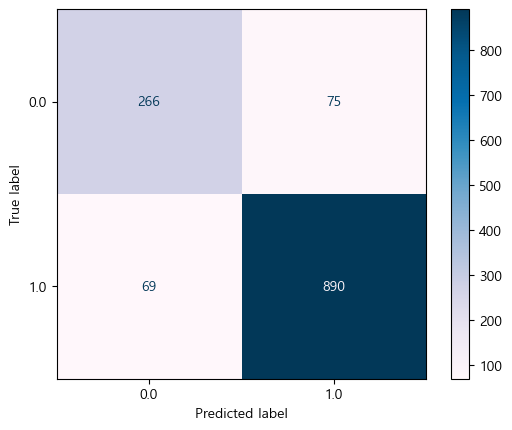

In [32]:
### 오차행렬 데이터를 시각화 하기 -> 이를 '오차행렬도'라고 칭한다.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_, )
disp.plot(cmap='PuBu');

![](설명_오차행렬(혼동행렬)의_긍정(Positive)_부정(Negative)_평가_결과.jpg)

### <오차 행렬(혼동 행렬)>

- 어떠한 유형의 오류가 발생하고 있는지를 나타내는 값

- 이를 시각화하는 것을 오차행렬도 또는 혼동행렬도라고 칭한다

- 정확도(score)의 값과 오차행렬도의 시각화 결과로 모델을 선정할 수 있음

### <해석 방법>

- 긍정(positive)적 오류인지, 부정(Negative)적 오류인지로 해석된다.

- 오류의 종류 : 긍정적(Positive) 오류와, 부정적(Negative) 오류로 구분한다.

    - FP(False Positive)
 
        - 예측 결과가 맞지는 않음(False)
     
        - 긍정적(Positive) 오류로 해석함
     
        - 위험하지 않은 오류
     
        - 0을 1로 예측한 경우
     
    - FN(False Negative)
 
        - 예측 결과가 맞지 않음(False)
     
        - 부정적(Negative) 오류로 해석함
     
        - 위험한 오류
     
        - 정확도(score)의 값이 크더라도, FN의 값이 큰 경우에는 재현율 값이 낮아지기에, 예측모델로 사용하는데 고려해야 함
     
        - 1을 0으로 예측한 경우
     
    - TP(True Positive)
 
        - 예측 결과가 맞는 경우(True)
     
        - 1을 1로 예측한 경우
     
    - TN(True Negative)

        - 예측 결과가 맞는 경우(True)
     
        - 0을 0으로 예측한 경우
     
### <평가에 사용되는 값>

- 정확도, 정밀도, 재현율, F1-Score

    - 정확도(Accuracy)
 
        - 분류 모델에서 `score()`을 통해 나온 값과 동일하다.
     
        - 예측 결과가 실제값과 얼마나정확한가를 나타내는 값
     
        - Accuracy = (TP+TN) /(TP+TN+FP+FN)
 
    - 정밀도(Precision)

        - 모델이 1로 예측한 데이터 중에 실제 1로 잘 예측한 값
     
        - Precision = TP / (TP+FP)
     
    - 재현율(recall)
 
        - 실제로 1인 데이터를 1로 예측한 값
     
        - Recall = TP / (TP+FN)
     
        - 위험한 오류가 포함되어 있음(1을 0으로 판단한 경우)
 
    - F1-Score
 
        - 정밀도와 재현율을 조합하여 하나의 통계치로 반환한 값
     
        - F1-Score = (정밀도* 재현율) / (정밀도 + 재현율)
     
### <최종 모델 선정 방법>

- 과소 및 과대 적합이 일어나지 않아야 함 : `score()`를 통해 확인함 -> Accuracy는 별도로 계산하지 않아도 됨

- 재현율과 F1-Score가 모두 높으면 우수한 모델로 평가할 수 있다.

- 재현율이 현저히 낮은 경우에는 모델 선정에서 고려할 필요성 있음(제외 대상 모델 또는 성능 향상 필요)

In [33]:
### 분류 모델 평가 라이브러리
# - 모두 함수 : 사용되는 데이터는 테스트(또는 검증) 종속 변수, 예측 결과

# - 정확도, 정밀도, 재현율, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
### 정확도
acc = accuracy_score(test_target, test_pred)

### 정밀도
pre = precision_score(test_target, test_pred)

### 재현율
rec = recall_score(test_target, test_pred)

### F-1 Score
f1 = f1_score(test_target, test_pred)

print(f'train_score ={train_score:.4f}, test_score={test_score:.4f},accuracy={acc:.4f}, precision={pre:.4f}, recall={rec:.4f}, f1_score={f1:.4f}')

train_score =0.9969, test_score=0.8892,accuracy=0.8892, precision=0.9223, recall=0.9281, f1_score=0.9252


#### 해석

- 정밀도, 재현율, F1-Score는 0.92이상으로 매우 높은 값으로 성능 좋은 모델로 분석된다.

- 훈련 정확도는 0.9969로 매우 높으나, 테스트 정확도는 0.8892로 다소 과대 적합을 보이고 있는 것으로 분석된다.

- 과대 적합을 줄일 수 있는 방법을 모색하거나, 다른 모델, 또는 데이터 양을 늘리는 방법을 수행할 필요성이 있다.